In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# 1) Inspection of data

In [127]:
df=pd.read_csv("r.csv")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  880 non-null    object 
 1   Subgroup         880 non-null    object 
 2   Year             880 non-null    int64  
 3   Source           880 non-null    object 
 4   Unit             880 non-null    object 
 5   Value            880 non-null    float64
 6   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 48.3+ KB


In [129]:
df.head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,< 25,2014,UNAIDS_GARPR_,Percent,64.30,NaN
1,Afghanistan,< 25,2012,UNAIDS_GARPR_,Percent,64.30,NaN
2,Afghanistan,< 25,2011,UNAIDS_GARPR_,Percent,95.14,NaN
3,Afghanistan,< 25,2009,UNAIDS_GARPR_,Percent,95.00,NaN
4,Afghanistan,25+,2014,UNAIDS_GARPR_,Percent,83.70,NaN


In [104]:
df["Value Footnotes"]=df["Value Footnotes"].replace(np.nan,"No record")

In [105]:
df.head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,< 25,2014,UNAIDS_GARPR_,Percent,64.30,No record
1,Afghanistan,< 25,2012,UNAIDS_GARPR_,Percent,64.30,No record
2,Afghanistan,< 25,2011,UNAIDS_GARPR_,Percent,95.14,No record
3,Afghanistan,< 25,2009,UNAIDS_GARPR_,Percent,95.00,No record
4,Afghanistan,25+,2014,UNAIDS_GARPR_,Percent,83.70,No record


In [106]:
#checking null values
df.isnull().sum()

Country or Area    0
Subgroup           0
Year               0
Source             0
Unit               0
Value              0
Value Footnotes    0
dtype: int64

In [107]:
df.isnull().sum()

Country or Area    0
Subgroup           0
Year               0
Source             0
Unit               0
Value              0
Value Footnotes    0
dtype: int64

In [108]:
df.describe()

,Year,Value
count,880.000000,880.000000
mean,2010.614773,71.298466
std,2.345671,23.098697
min,2007.000000,0.000000
25%,2009.000000,59.000000
50%,2011.000000,78.200000
75%,2013.000000,89.015000
max,2014.000000,100.000000


In [109]:
#checking for duplicate values
df.duplicated().sum()

np.int64(0)

# 2) Data Visualization

In [110]:
#Checking column for unique values

In [111]:
unique_subgroups = df['Year'].unique()
unique_subgroups

array([2014, 2012, 2011, 2009, 2013, 2007])

#Pie chart

#using pie chart to show data distribution every year

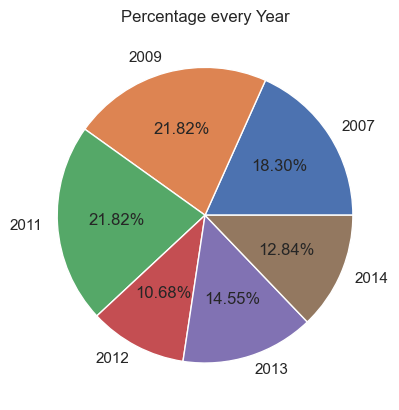

In [123]:
pc=df.groupby("Year").agg({"Year":"count"})
plt.pie(pc["Year"],labels=pc.index,autopct="%1.2f%%")
plt.title("Percentage every Year")
plt.show()

#using countplot to understand frequency of every catagory in subgroup

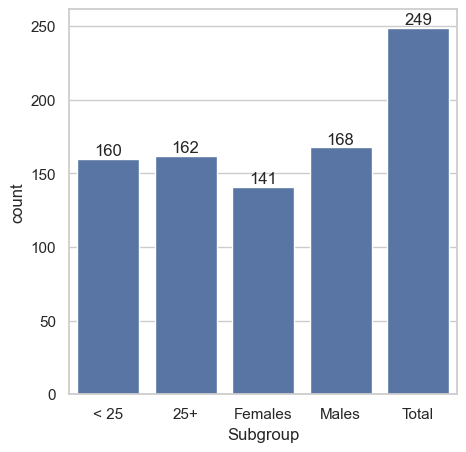

In [124]:
plt.figure(figsize=(5,5))
c=sns.countplot(x="Subgroup",data=df)
c.bar_label(c.containers[0])
plt.show()

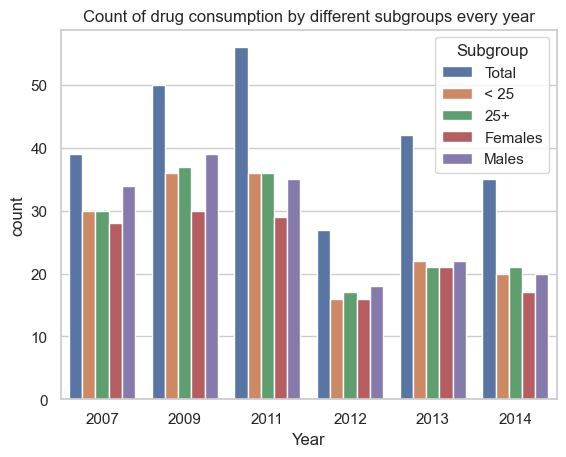

In [125]:
sns.countplot(x="Year",data=df,hue="Subgroup")
plt.title("Count of drug consumption by different subgroups every year")
plt.show()

#by above graph we can analyse every year males are using more drugs than females

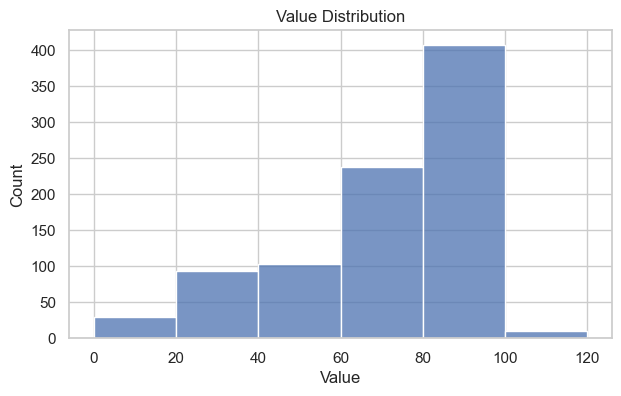

In [115]:
plt.figure(figsize=(7,4))
sns.histplot(x="Value",bins=[0,20,40,60,80,100,120],data=df)
plt.title("Value Distribution")
plt.show()

#Above histogram help to visualize value distributions among "Value" column

# 3) Data analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  414 non-null    object 
 1   AgeGroup         414 non-null    object 
 2   Year             414 non-null    int64  
 3   Value            414 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.1+ KB
None


,Country or Area,AgeGroup,Year,Value
0,Afghanistan,25-34,2009,94.00
1,Afghanistan,25-34,2011,93.56
2,Afghanistan,25-34,2012,83.70
3,Afghanistan,25-34,2014,83.70
4,Afghanistan,Unknown,2007,46.00


Objective 1 & 2: Patient Safety and Health Outcomes


,Country or Area,AgeGroup,mean,median,std
0,Afghanistan,25-34,88.740000,88.630000,5.822462
1,Afghanistan,Unknown,78.860000,80.150000,17.683204
2,Albania,Unknown,78.250000,78.250000,5.303301
3,Algeria,Unknown,46.843333,46.843333,NaN
4,Argentina,25-34,59.000000,59.000000,NaN



Objective 3: Lifespan
Correlation between Year and Value for 25-34: 0.22040358178839314
Correlation between Year and Value for Unknown: 0.20500796727137902

Objective 4: Performer Experience


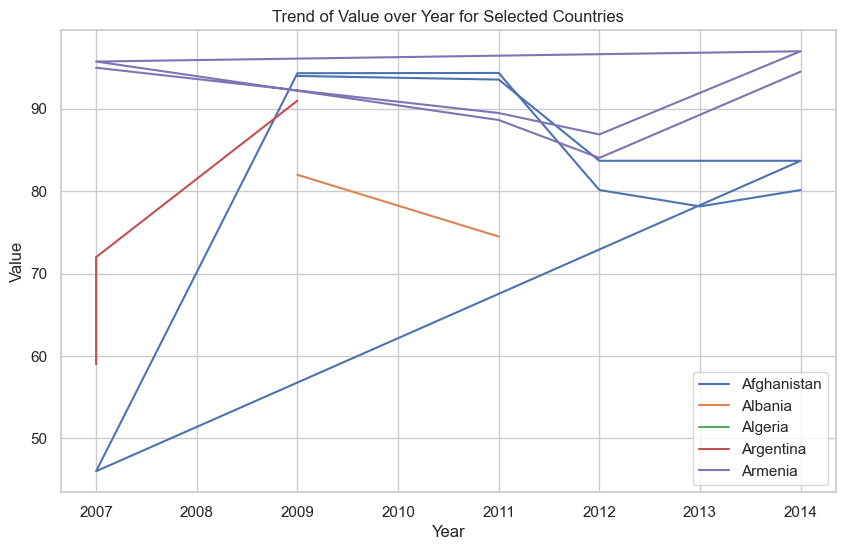


Objective 5: Disease Transmission


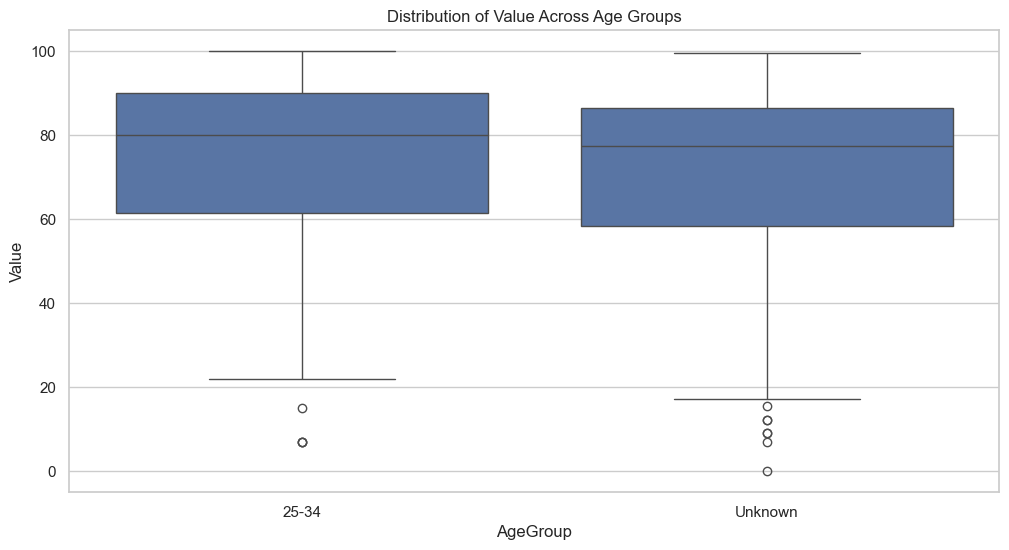

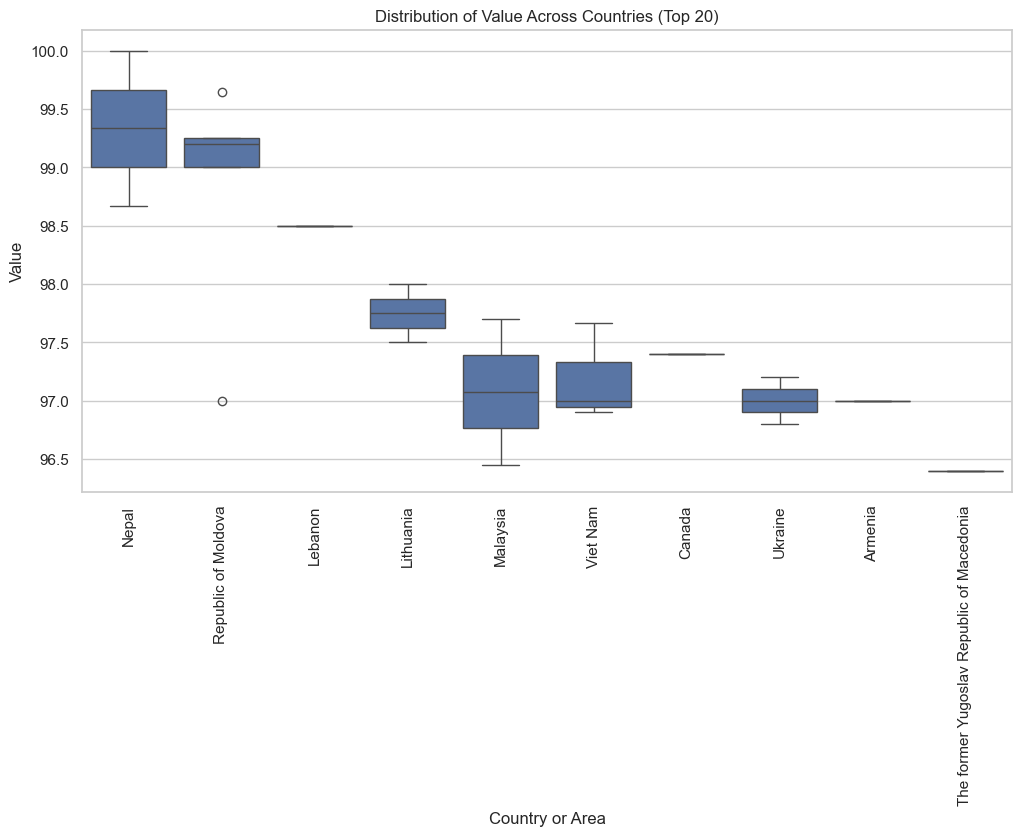

In [116]:
# 1. Feature Engineering: Create 'AgeGroup'
def determine_age_group(row):
    subgroup = row['Subgroup']
    year = row['Year']
    if subgroup == '<25':
        if year >= 2014:
            return '15-24'
        elif year >= 2012:
            return '15-24'
        elif year >= 2010:
            return '15-24'
        elif year >= 2008:
            return '15-24'
        elif year >= 2007:
            return '15-24'
    elif subgroup == '25+':
        if year >= 2014:
            return '25-34'
        elif year >= 2012:
            return '25-34'
        elif year >= 2010:
            return '25-34'
        elif year >= 2008:
            return '25-34'
        elif year >= 2007:
            return '25-34'
    return 'Unknown'

df['AgeGroup'] = df.apply(determine_age_group, axis=1)

# 2. Data Aggregation
df_aggregated = df.groupby(['Country or Area', 'AgeGroup', 'Year'])['Value'].mean().reset_index()

# 4. Prepare for Analysis
print(df_aggregated.info())
display(df_aggregated.head())
# Objective 1 & 2: Patient Safety and Health Outcomes

print("Objective 1 & 2: Patient Safety and Health Outcomes")
summary_stats = df_aggregated.groupby(['Country or Area', 'AgeGroup'])['Value'].agg(['mean', 'median', 'std']).reset_index()
display(summary_stats.head())

# Objective 3: Lifespan (Indirectly through Value over time)
print("\nObjective 3: Lifespan")
for age_group in df_aggregated['AgeGroup'].unique():
    correlation = df_aggregated[df_aggregated['AgeGroup'] == age_group][['Year', 'Value']].corr().iloc[0, 1]
    print(f"Correlation between Year and Value for {age_group}: {correlation}")

# Objective 4: Performer Experience (Trends in Value)
print("\nObjective 4: Performer Experience")
plt.figure(figsize=(10, 6))
for country in df_aggregated['Country or Area'].unique()[:5]:  # Limit to 5 countries for visualization
    country_data = df_aggregated[df_aggregated['Country or Area'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trend of Value over Year for Selected Countries')
plt.legend()
plt.show()

# Objective 5: Disease Transmission
print("\nObjective 5: Disease Transmission")
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='Value', data=df_aggregated)
plt.title('Distribution of Value Across Age Groups')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country or Area', y='Value', data=df_aggregated.sort_values(by='Value', ascending=False).head(20))
plt.xticks(rotation=90)
plt.title('Distribution of Value Across Countries (Top 20)')
plt.show()

# 4) Data Distribution and Correlations For Numerical Columns


Data Distribution and Correlations:


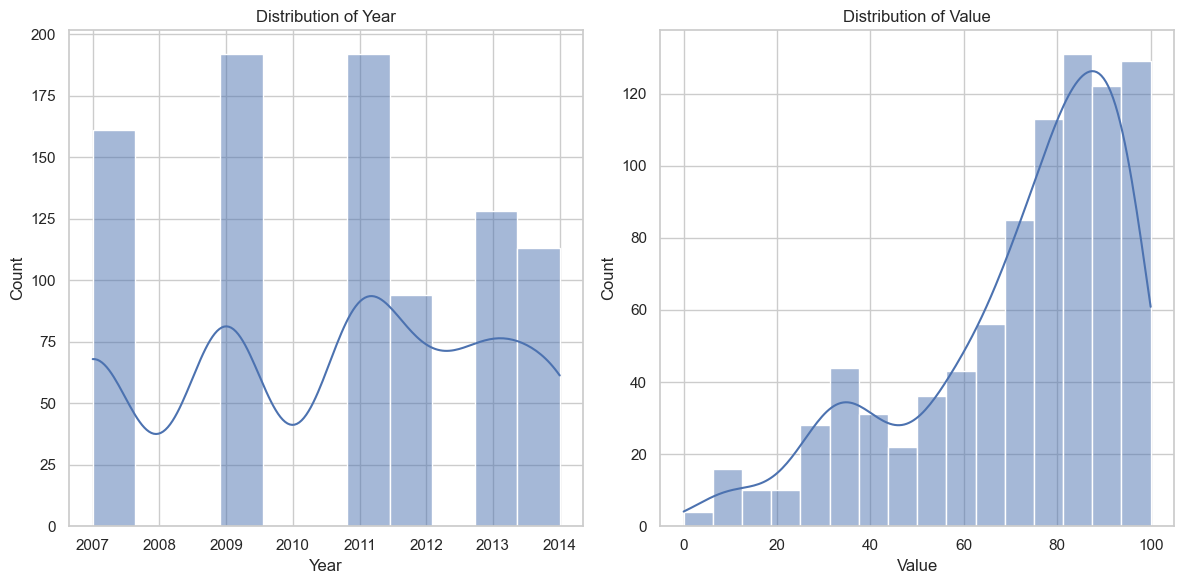

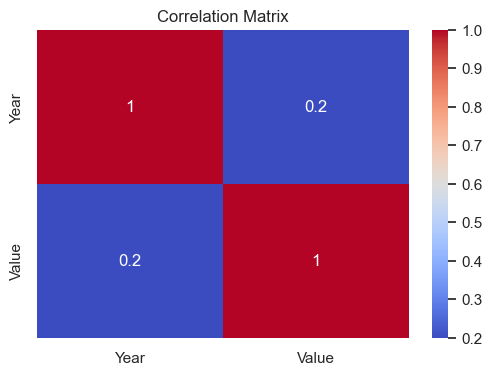

In [117]:

print("\nData Distribution and Correlations:")
numerical_cols = ['Year', 'Value']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5) Hypothesis analysis

In [122]:
# Separate data into two groups based on Subgroup
group1 = df[df['Subgroup'] == '< 25']['Value'].dropna()
group2 = df[df['Subgroup'] == '25+']['Value'].dropna()

# Perform t-test
t_stat, p_val = stats.ttest_ind(group1, group2)

# Print the hypothesis results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: Significant difference between groups")
else:
    print("Fail to reject null hypothesis: No significant difference between groups")


T-statistic: -1.0859934346219178
P-value: 0.2782992977037696
Fail to reject null hypothesis: No significant difference between groups
